In [112]:
import requests
from bs4 import BeautifulSoup
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [194]:
G = nx.DiGraph()

base_url = "https://github.com/girafe-ai/msai-probability"
start_url = "https://github.com/girafe-ai/msai-probability"

def clean_url(url):
    if url.startswith(("https://github.com/girafe-ai/msai-probability")):
        return url
    elif url.startswith("/girafe-ai/msai-probability"):
        return "https://github.com" + url
    return None

def get_links(url, visited):
    try:
        response = requests.get(url)
        if response.status_code != 200:
            return []
        soup = BeautifulSoup(response.text, "html.parser")
        links = soup.find_all(["a", "link", "area"], href=True)
        valid_links = [clean_url(link['href']) for link in links]
        valid_links = [link for link in valid_links if link]
        return valid_links
    except Exception as e:
        print(f"Error fetching {url}: {e}")
        return []

max_nodes = 100
visited = set()
queue = [start_url]

while queue and len(G.nodes) < max_nodes:
    current_url = queue.pop(0)
    if current_url in visited:
        continue
    
    visited.add(current_url)
    G.add_node(current_url)
    print(len(G.nodes))
    
    links = get_links(current_url, visited)
    for link in links:
        if len(G.nodes) >= max_nodes:
            break
        G.add_node(link) 
        G.add_edge(current_url, link) 
        
        if link not in visited and link not in queue:
            queue.append(link)

1
50
51
70
74
74
74
80
84


In [195]:
print(len(G.nodes))
print(len(G.edges))

100
164


In [196]:
for i, node in enumerate(list(G.nodes)):
    print(i, node)

0 https://github.com/girafe-ai/msai-probability
1 https://github.com/girafe-ai/msai-probability/stargazers
2 https://github.com/girafe-ai/msai-probability/forks
3 https://github.com/girafe-ai/msai-probability/branches
4 https://github.com/girafe-ai/msai-probability/tags
5 https://github.com/girafe-ai/msai-probability/activity
6 https://github.com/girafe-ai/msai-probability/issues
7 https://github.com/girafe-ai/msai-probability/pulls
8 https://github.com/girafe-ai/msai-probability/actions
9 https://github.com/girafe-ai/msai-probability/projects
10 https://github.com/girafe-ai/msai-probability/security
11 https://github.com/girafe-ai/msai-probability/pulse
12 https://github.com/girafe-ai/msai-probability/commits/master/
13 https://github.com/girafe-ai/msai-probability/tree/master/.github/workflows
14 https://github.com/girafe-ai/msai-probability/tree/master/Lecture_slides
15 https://github.com/girafe-ai/msai-probability/tree/master/Seminar_materials
16 https://github.com/girafe-ai/msai-p

In [197]:
print(list(G.edges)[:10])

[('https://github.com/girafe-ai/msai-probability', 'https://github.com/girafe-ai/msai-probability'), ('https://github.com/girafe-ai/msai-probability', 'https://github.com/girafe-ai/msai-probability/stargazers'), ('https://github.com/girafe-ai/msai-probability', 'https://github.com/girafe-ai/msai-probability/forks'), ('https://github.com/girafe-ai/msai-probability', 'https://github.com/girafe-ai/msai-probability/branches'), ('https://github.com/girafe-ai/msai-probability', 'https://github.com/girafe-ai/msai-probability/tags'), ('https://github.com/girafe-ai/msai-probability', 'https://github.com/girafe-ai/msai-probability/activity'), ('https://github.com/girafe-ai/msai-probability', 'https://github.com/girafe-ai/msai-probability/issues'), ('https://github.com/girafe-ai/msai-probability', 'https://github.com/girafe-ai/msai-probability/pulls'), ('https://github.com/girafe-ai/msai-probability', 'https://github.com/girafe-ai/msai-probability/actions'), ('https://github.com/girafe-ai/msai-pr

In [198]:
am = nx.adjacency_matrix(G)
row_sums = np.array(am.sum(axis=1)).flatten()
row_sums[row_sums == 0] = 1
num_nodes = G.number_of_nodes()
tm = am / row_sums[:, np.newaxis]
tm = tm.toarray()

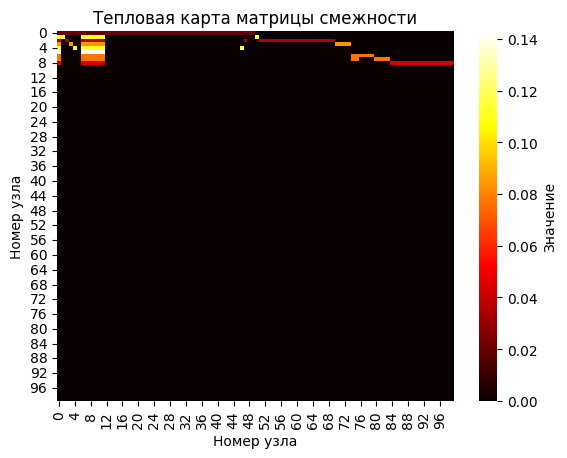

In [199]:
sns.heatmap(tm, cmap='hot', cbar_kws={'label': 'Значение'})
plt.title('Тепловая карта матрицы смежности')
plt.xlabel('Номер узла')
plt.ylabel('Номер узла')
plt.show()

In [200]:
n = tm.shape[0]
row_sums = tm.sum(axis=1)
zero_rows = (row_sums == 0)
tm[zero_rows] = 1.0 / n
P = 0.85 * tm + (1 - 0.85) * np.ones((n, n)) / n

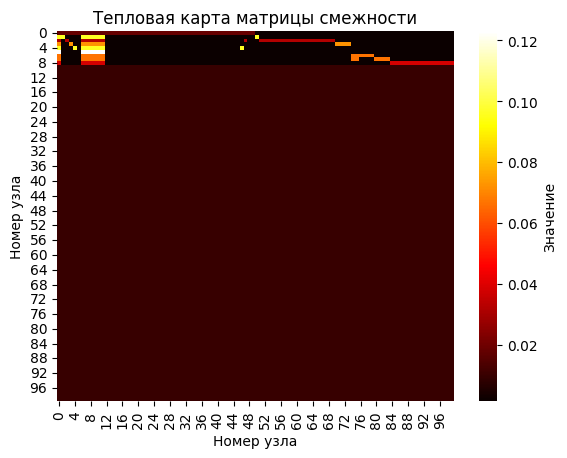

In [201]:
sns.heatmap(P, cmap='hot', cbar_kws={'label': 'Значение'})
plt.title('Тепловая карта матрицы смежности')
plt.xlabel('Номер узла')
plt.ylabel('Номер узла')
plt.show()

In [202]:

max_iterations = 100

n = P.shape[0]
I = np.ones(n) / n
from tqdm import tqdm
errors_real = []
with tqdm(total=max_iterations, desc="Optimizing") as pbar:
    for _ in range(max_iterations):
        I_old = I.copy()
        I = P.T @ I 
        error = np.linalg.norm(I - I_old) 
        errors_real.append(error)
        pbar.set_postfix({'error': 1})
        pbar.update(1)

Optimizing: 100%|██████████| 100/100 [00:00<00:00, 1074.45it/s, error=1]


In [208]:
print("Сумма по строкам:", np.sum(P, axis=1)[:10])
print("Размер матрицы:", P.shape)

eigenvalues, eigenvectors = np.linalg.eig(P.T)

print("\nМаксимальное собственное значение:", np.max(np.abs(eigenvalues)))
print("Минимальное собственное значение:", np.min(np.abs(eigenvalues)))

sorted_eigs = sorted(eigenvalues, key=abs, reverse=True)
print("\nТоп-5 собственных значений по модулю:")
for i, eig in enumerate(sorted_eigs[:5]):
    print(f"{i+1}. {eig:.6f}")

stationary = np.real(eigenvectors[:, np.argmax(np.abs(eigenvalues))].flatten())


print("\nСумма компонент стационарного вектора:", np.sum(stationary))
print("Первые 5 компонент стационарного вектора:", stationary[:5])

Сумма по строкам: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Размер матрицы: (100, 100)

Максимальное собственное значение: 0.9999999999999998
Минимальное собственное значение: 2.1351498109963575e-81

Топ-5 собственных значений по модулю:
1. 1.000000+0.000000j
2. 0.100333+0.046018j
3. 0.100333-0.046018j
4. 0.094444+0.000000j
5. 0.073643+0.000000j

Сумма компонент стационарного вектора: -9.8578675433811
Первые 5 компонент стационарного вектора: [-0.15845834 -0.10130736 -0.09461158 -0.09873303 -0.10130736]


In [209]:
print(I)

[0.0160743  0.0102768  0.00959757 0.01001566 0.0102768  0.00930622
 0.0160743  0.0160743  0.0160743  0.0160743  0.0160743  0.0160743
 0.00930622 0.00930622 0.00930622 0.00930622 0.00930622 0.00930622
 0.00930622 0.00930622 0.00930622 0.00930622 0.00930622 0.00930622
 0.00930622 0.00930622 0.00930622 0.00930622 0.00930622 0.00930622
 0.00930622 0.00930622 0.00930622 0.00930622 0.00930622 0.00930622
 0.00930622 0.00930622 0.00930622 0.00930622 0.00930622 0.00930622
 0.00930622 0.00930622 0.00930622 0.00930622 0.0102768  0.00959757
 0.00930622 0.00930622 0.01000354 0.00932431 0.00932431 0.00932431
 0.00932431 0.00932431 0.00932431 0.00932431 0.00932431 0.00932431
 0.00932431 0.00932431 0.00932431 0.00932431 0.00932431 0.00932431
 0.00932431 0.00932431 0.00932431 0.00932431 0.0097424  0.0097424
 0.0097424  0.0097424  0.01113498 0.01113498 0.01008396 0.01008396
 0.01008396 0.01008396 0.01008396 0.01008396 0.01008396 0.01008396
 0.009627   0.009627   0.009627   0.009627   0.009627   0.009627

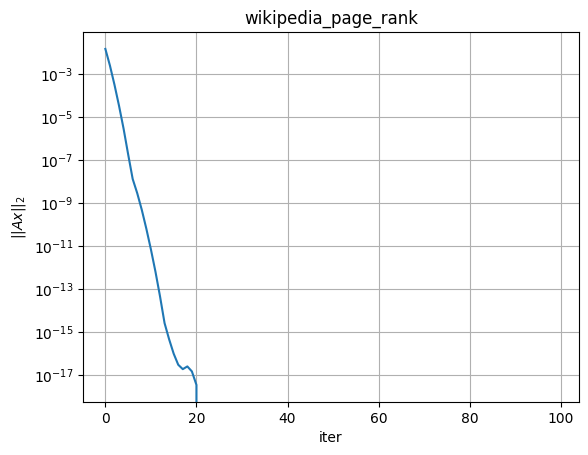

In [210]:
plt.plot(errors_real)
plt.yscale('log')
plt.title("wikipedia_page_rank")
plt.ylabel("$||Ax||_{2}$")
plt.xlabel("iter")
plt.grid()

In [211]:
node_prob_pairs = list(zip(list(G.nodes()), I))

sorted_pairs = sorted(node_prob_pairs, key=lambda x: x[1], reverse=True)
    
print("Ноды в порядке убывания вероятности перехода:")
for node, prob in sorted_pairs:
    print(f"{node}: {prob:.6f}")


Ноды в порядке убывания вероятности перехода:
https://github.com/girafe-ai/msai-probability: 0.016074
https://github.com/girafe-ai/msai-probability/issues: 0.016074
https://github.com/girafe-ai/msai-probability/pulls: 0.016074
https://github.com/girafe-ai/msai-probability/actions: 0.016074
https://github.com/girafe-ai/msai-probability/projects: 0.016074
https://github.com/girafe-ai/msai-probability/security: 0.016074
https://github.com/girafe-ai/msai-probability/pulse: 0.016074
https://github.com/girafe-ai/msai-probability/labels: 0.011135
https://github.com/girafe-ai/msai-probability/milestones: 0.011135
https://github.com/girafe-ai/msai-probability/stargazers: 0.010277
https://github.com/girafe-ai/msai-probability/tags: 0.010277
https://github.com/girafe-ai/msai-probability/releases: 0.010277
https://github.com/girafe-ai/msai-probability/issues?q=is%3Aopen+is%3Aissue: 0.010084
https://github.com/girafe-ai/msai-probability/issues?q=is%3Aissue+is%3Aclosed: 0.010084
https://github.com/g

In [221]:
G = nx.DiGraph()

base_url = "https://ru.wikipedia.org/wiki"
start_url = "https://ru.wikipedia.org/wiki/%D0%A6%D0%B5%D0%BF%D1%8C_%D0%9C%D0%B0%D1%80%D0%BA%D0%BE%D0%B2%D0%B0"

def clean_url(url):
    if url.startswith(("https://ru.wikipedia.org/wiki")):
        return url
    elif url.startswith("/wiki/"):
        return "https://ru.wikipedia.org" + url
    return None

def get_links(url, visited):
    try:
        response = requests.get(url)
        if response.status_code != 200:
            return []
        soup = BeautifulSoup(response.text, "html.parser")
        links = soup.find_all(["a", "link", "area", "img"], href=True)
        valid_links = [clean_url(link['href']) for link in links]
        valid_links = [link for link in valid_links if link]
        return valid_links
    except Exception as e:
        print(f"Error fetching {url}: {e}")
        return []

max_nodes = 1000
visited = set()
queue = [start_url]

while queue and len(G.nodes) < max_nodes:
    current_url = queue.pop(0)
    if current_url in visited:
        continue
    
    visited.add(current_url)
    G.add_node(current_url)
    print(len(G.nodes))
    
    links = get_links(current_url, visited)
    for link in links:
        if len(G.nodes) >= max_nodes:
            break
        G.add_node(link) 
        G.add_edge(current_url, link) 
        
        if link not in visited and link not in queue:
            queue.append(link)

1
188
207
212
230
341
363
514
595
628
790
842
850
864
Error fetching https://ru.wikipedia.org/wiki/%D0%A3%D1%80%D0%B0%D0%B2%D0%BD%D0%B5%D0%BD%D0%B8%D0%B5_%D0%9A%D0%BE%D0%BB%D0%BC%D0%BE%D0%B3%D0%BE%D1%80%D0%BE%D0%B2%D0%B0-%D0%A7%D0%B5%D0%BF%D0%BC%D0%B5%D0%BD%D0%B0: HTTPSConnectionPool(host='ru.wikipedia.org', port=443): Max retries exceeded with url: /wiki/%D0%A3%D1%80%D0%B0%D0%B2%D0%BD%D0%B5%D0%BD%D0%B8%D0%B5_%D0%9A%D0%BE%D0%BB%D0%BC%D0%BE%D0%B3%D0%BE%D1%80%D0%BE%D0%B2%D0%B0-%D0%A7%D0%B5%D0%BF%D0%BC%D0%B5%D0%BD%D0%B0 (Caused by SSLError(SSLEOFError(8, '[SSL: UNEXPECTED_EOF_WHILE_READING] EOF occurred in violation of protocol (_ssl.c:1007)')))
864
870
870
874
Error fetching https://ru.wikipedia.org/wiki/%D0%9D%D0%B5%D1%80%D0%B0%D0%B7%D0%BB%D0%BE%D0%B6%D0%B8%D0%BC%D0%B0%D1%8F_%D1%86%D0%B5%D0%BF%D1%8C_%D0%9C%D0%B0%D1%80%D0%BA%D0%BE%D0%B2%D0%B0: HTTPSConnectionPool(host='ru.wikipedia.org', port=443): Max retries exceeded with url: /wiki/%D0%9D%D0%B5%D1%80%D0%B0%D0%B7%D0%BB%D0%BE%D0%B6%D0%B

In [222]:
print(len(G.nodes))
print(len(G.edges))

1000
1702


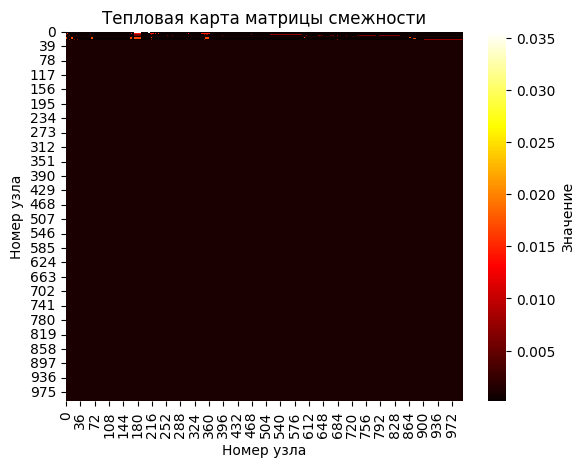

In [223]:
am = nx.adjacency_matrix(G)
row_sums = np.array(am.sum(axis=1)).flatten()
row_sums[row_sums == 0] = 1
num_nodes = G.number_of_nodes()
tm = am / row_sums[:, np.newaxis]
tm = tm.toarray()
n = tm.shape[0]
row_sums = tm.sum(axis=1)
zero_rows = (row_sums == 0)
tm[zero_rows] = 1.0 / n
P = 0.85 * tm + (1 - 0.85) * np.ones((n, n)) / n
sns.heatmap(P, cmap='hot', cbar_kws={'label': 'Значение'})
plt.title('Тепловая карта матрицы смежности')
plt.xlabel('Номер узла')
plt.ylabel('Номер узла')
plt.show()

Optimizing: 100%|██████████| 100/100 [00:00<00:00, 351.89it/s, error=1]


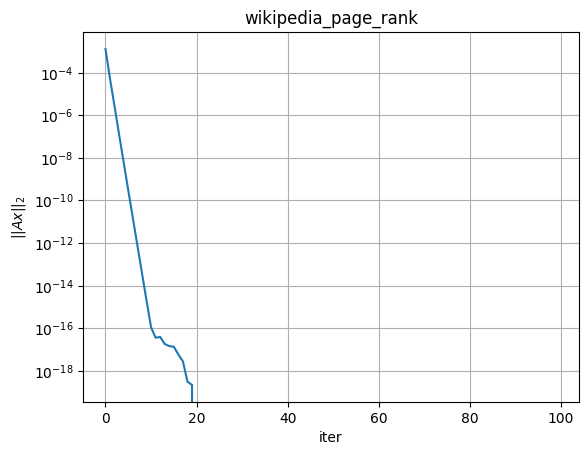

In [224]:
max_iterations = 100

n = P.shape[0]
I = np.ones(n) / n
from tqdm import tqdm
errors_real = []
with tqdm(total=max_iterations, desc="Optimizing") as pbar:
    for _ in range(max_iterations):
        I_old = I.copy()
        I = P.T @ I
        error = np.linalg.norm(I - I_old) 
        errors_real.append(error)
        pbar.set_postfix({'error': 1})
        pbar.update(1)
plt.plot(errors_real)
plt.yscale('log')
plt.title("wikipedia_page_rank")
plt.ylabel("$||Ax||_{2}$")
plt.xlabel("iter")
plt.grid()

In [226]:
node_prob_pairs = list(zip(list(G.nodes()), I))

sorted_pairs = sorted(node_prob_pairs, key=lambda x: x[1], reverse=True)

print("Ноды в порядке убывания вероятности перехода:")
for node, prob in sorted_pairs:
    print(f"{prob:.6f}: {node}")

Ноды в порядке убывания вероятности перехода:
0.001280: https://ru.wikipedia.org/wiki/%D0%A1%D0%BB%D1%83%D0%B6%D0%B5%D0%B1%D0%BD%D0%B0%D1%8F:%D0%9C%D0%BE%D1%91_%D0%BE%D0%B1%D1%81%D1%83%D0%B6%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5
0.001280: https://ru.wikipedia.org/wiki/%D0%A1%D0%BB%D1%83%D0%B6%D0%B5%D0%B1%D0%BD%D0%B0%D1%8F:%D0%9C%D0%BE%D0%B9_%D0%B2%D0%BA%D0%BB%D0%B0%D0%B4
0.001280: https://ru.wikipedia.org/wiki/%D0%97%D0%B0%D0%B3%D0%BB%D0%B0%D0%B2%D0%BD%D0%B0%D1%8F_%D1%81%D1%82%D1%80%D0%B0%D0%BD%D0%B8%D1%86%D0%B0
0.001280: https://ru.wikipedia.org/wiki/%D0%92%D0%B8%D0%BA%D0%B8%D0%BF%D0%B5%D0%B4%D0%B8%D1%8F:%D0%A1%D0%BE%D0%B4%D0%B5%D1%80%D0%B6%D0%B0%D0%BD%D0%B8%D0%B5
0.001280: https://ru.wikipedia.org/wiki/%D0%92%D0%B8%D0%BA%D0%B8%D0%BF%D0%B5%D0%B4%D0%B8%D1%8F:%D0%98%D0%B7%D0%B1%D1%80%D0%B0%D0%BD%D0%BD%D1%8B%D0%B5_%D1%81%D1%82%D0%B0%D1%82%D1%8C%D0%B8
0.001280: https://ru.wikipedia.org/wiki/%D0%A1%D0%BB%D1%83%D0%B6%D0%B5%D0%B1%D0%BD%D0%B0%D1%8F:%D0%A1%D0%BB%D1%83%D1%87%D0%B0%D0%B9%D0%BD%D0%B0%D1%